#Titanic - predicting the survivors

##Importando bibibliotecas - Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import os
import urllib.request
import matplotlib.pyplot as plt
from zipfile import ZipFile

##Importando os dados e separando os dados - Getting the data and separating

In [2]:
DOWNLOAD_URL = "https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/titanic.zip"
DATASET_PATH = "/content/dataset_titanic"

# Função para obtenção dos dados
def fetch_data(download_url=DOWNLOAD_URL, dataset_path=DATASET_PATH):
    os.makedirs(dataset_path, exist_ok=True) # cria o diretório
    zip_path = os.path.join(dataset_path, "titanic.zip")
    urllib.request.urlretrieve(download_url, zip_path)
    files = ZipFile(zip_path,'r')
    files.extractall()
    files.close()

# Função para carregar os dados de treinamento em um dataframe pandas
def load_data_train(file_name = "train.csv"):
    csv_path = os.path.join(file_name)
    return pd.read_csv(csv_path)

# Função para carregar os dados de teste em um dataframe pandas
def load_data_test(file_name = "test.csv"):
    csv_path = os.path.join(file_name)
    return pd.read_csv(csv_path)

In [3]:
fetch_data()
df = load_data_train()
df_test = load_data_test()

In [4]:
gender_sub = pd.read_csv('/content/gender_submission.csv')
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
test = pd.read_csv('/content/test.csv')

In [6]:
test['Survived']=gender_sub['Survived']

In [7]:
test[['Sex', 'Survived']].head(30)

,Sex,Survived
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1
5,male,0
6,female,1
7,male,0
8,female,1
9,male,0


##Explorando os dados - Exploring the data

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df_test.shape

(418, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Mapa de calor de correlação das características - The correlation heatmap of the features

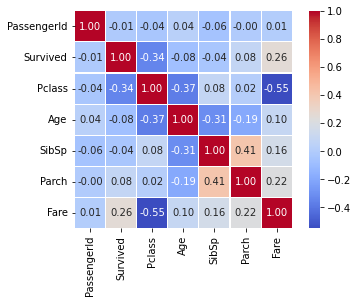

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

###Mostrando gráficos sobre os dados - Plotting about the data

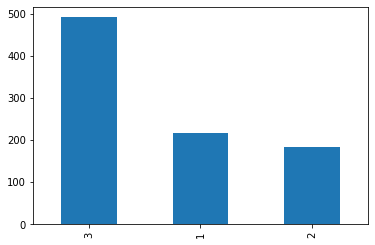

In [14]:
df.Pclass.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Embarked')

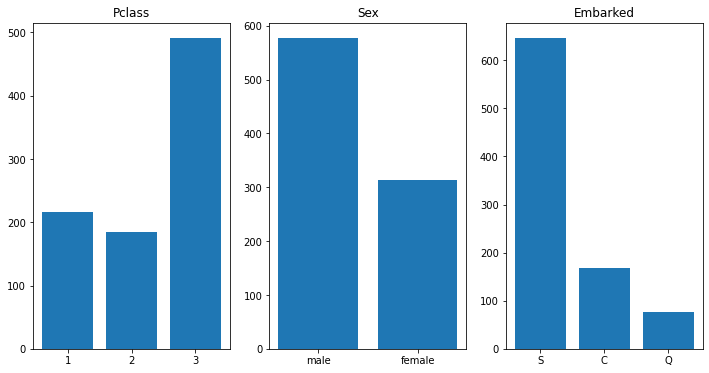

In [15]:
fig, axis = plt.subplots(ncols=3,figsize = (12, 6))
axis[0].bar(df.Pclass.unique(), height = df.Pclass.value_counts())
axis[0].set_title("Pclass")

axis[1].bar(df.Sex.unique(), height = df.Sex.value_counts())
axis[1].set_title("Sex")

df.Embarked.fillna('S', inplace=True)
axis[2].bar(df.Embarked.unique(), height = df.Embarked.value_counts())
axis[2].set_title("Embarked")

Text(0.5, 1.0, 'Embarked')

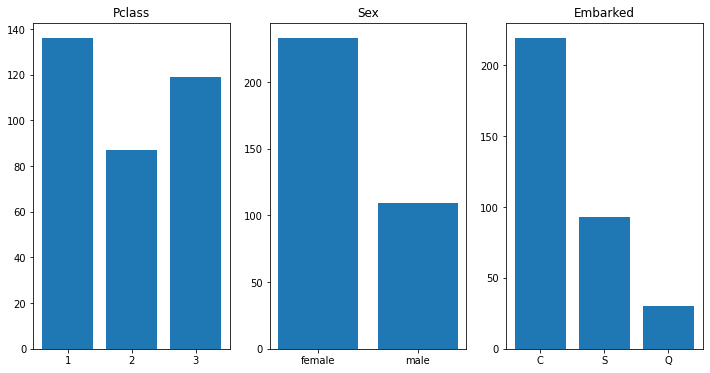

In [16]:
fig, axis = plt.subplots(ncols=3,figsize = (12, 6))
axis[0].bar(df[df.Survived == 1].Pclass.unique(), height = df[df.Survived == 1].Pclass.value_counts())
axis[0].set_title("Pclass")

axis[1].bar(df[df.Survived == 1].Sex.unique(), height = df[df.Survived == 1].Sex.value_counts())
axis[1].set_title("Sex")

axis[2].bar(df[df.Survived == 1].Embarked.dropna().unique(), height = df[df.Survived == 1].Embarked.value_counts())
axis[2].set_title("Embarked")

Text(0.5, 1.0, 'Parch')

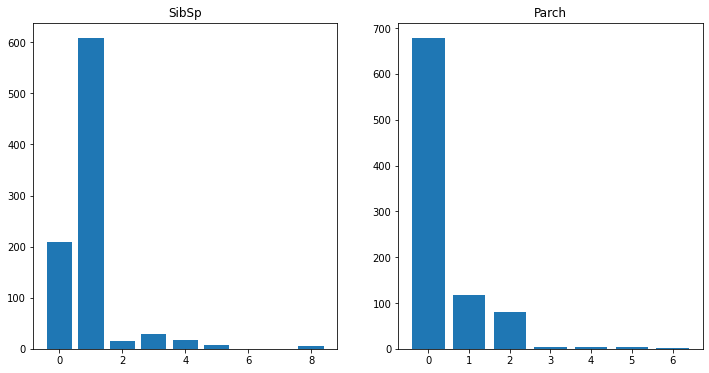

In [17]:
fig, axis = plt.subplots(ncols=2,figsize = (12, 6))
axis[0].bar(df.SibSp.unique(), height = df.SibSp.value_counts())
axis[0].set_title("SibSp")

axis[1].bar(df.Parch.unique(), height = df.Parch.value_counts())
axis[1].set_title("Parch")

Text(0.5, 1.0, 'Parch')

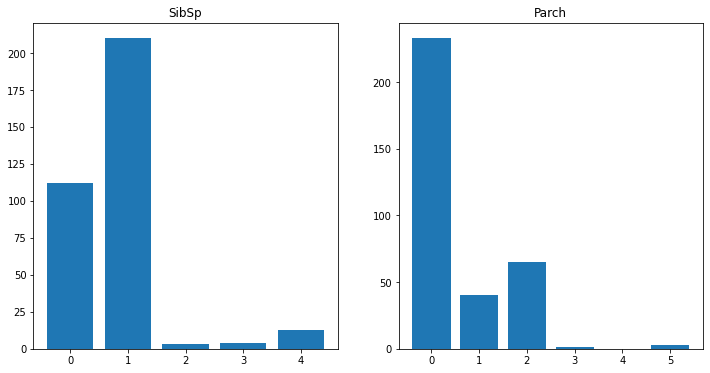

In [18]:
fig, axis = plt.subplots(ncols=2,figsize = (12, 6))
axis[0].bar(df[df.Survived == 1].SibSp.unique(), height = df[df.Survived == 1].SibSp.value_counts())
axis[0].set_title("SibSp")

axis[1].bar(df[df.Survived == 1].Parch.unique(), height = df[df.Survived == 1].Parch.value_counts())
axis[1].set_title("Parch")

Text(0.5, 1.0, 'Pclass')

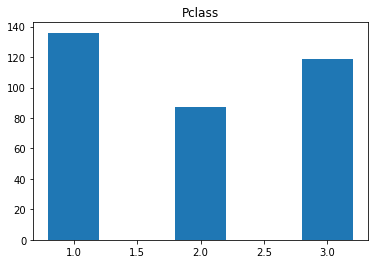

In [19]:
fig, axis = plt.subplots()
axis.bar(df[df.Survived == 1].Pclass.unique(), height = df[df.Survived == 1].Pclass.value_counts(), width=0.4)
axis.set_title("Pclass")

In [20]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

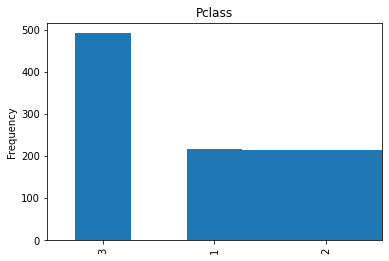

In [21]:
df.Fare.value_counts().plot(kind="hist", title='Fare')
df.Pclass.value_counts().plot( kind='bar', title='Pclass')

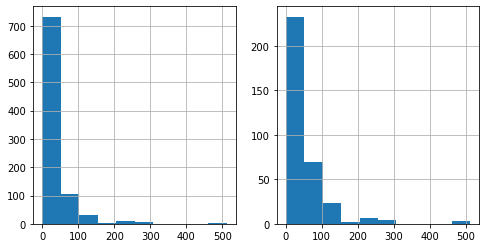

In [22]:
fig, axis = plt.subplots(ncols=2 ,figsize = (8, 4))

axis[0] = df.Fare.hist(ax=axis[0])
axis[1] = df[df.Survived == 1].Fare.hist(ax=axis[1])

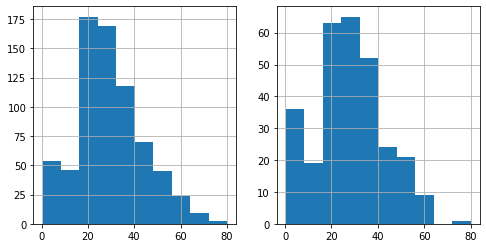

In [23]:
fig, axis = plt.subplots(ncols=2 ,figsize = (8, 4))

axis[0] = df.Age.hist(ax=axis[0])
axis[1] = df[df.Survived == 1].Age.hist(ax=axis[1])

##Juntando os dados - Merging the data

In [24]:
df_merged = pd.concat(objs=[df, df_test], axis=0).reset_index(drop=True)
df_target=df['Survived']
passenger_id = df_test.PassengerId
df_merged.drop(columns='Survived', inplace=True)

In [25]:
df_merged

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [27]:
df_merged.drop('Cabin', inplace=True, axis=1) #A lot of missing values

##Extraindo os títulos dos nomes - Extracting the title of the names

In [28]:
df_merged['Title'] = df_merged.Name.str.extract('([A-Za-z]+)\.')

In [29]:
df_merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

##Completando os valores da idade faltando com base no título de cada nome - Filling the age missing values, using the title of each name

In [30]:
def input_age_title(title):
  return round(df_merged[df_merged.Title==title].Age.mean(), 0)

In [31]:
df_merged.Age.fillna(input_age_title(df_merged.Title), inplace=True)

In [32]:
df_merged.Fare.fillna(df_merged.Fare.median(), inplace=True)

In [33]:
df_merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


##Tirando colunas não necessárias - Droping unnecessary columns 

In [34]:
excluded_columns=['PassengerId', 'Name', 'Ticket','Title']
df_merged.drop(excluded_columns, axis=1, inplace=True)

##Transformando os valores categóricos em númericos - transforming the categorical values in numeric

In [35]:
df_merged['Sex_binary'] = df_merged.Sex.map({'male':0, 'female':1})

In [36]:
embarked_dummies= pd.get_dummies(df_merged.Embarked, prefix='Embarked')

In [37]:
df_merged.drop('Embarked', axis=1, inplace=True)
df_merged=pd.concat([df_merged, embarked_dummies], axis=1)

df_merged.drop('Sex', axis=1, inplace=True)

In [38]:
df_merged.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,1


In [39]:
df_train=df_merged[:891]
df_test=df_merged[891:]

In [40]:
df_train

,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1
888,3,30.0,1,2,23.4500,1,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0


##Criando os modelos - Creating the models

In [41]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [68]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [79]:
cv = KFold(5)

In [43]:
data = 0
data = pd.concat([df_train, df_target], axis=1).reset_index(drop=True)

In [44]:
data.tail()

,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_C,Embarked_Q,Embarked_S,Survived
886,2,27.0,0,0,13.00,0,0,0,1,0
887,1,19.0,0,0,30.00,1,0,0,1,1
888,3,30.0,1,2,23.45,1,0,0,1,0
889,1,26.0,0,0,30.00,0,1,0,0,1
890,3,32.0,0,0,7.75,0,0,1,0,0


In [89]:
treeClass_features = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=2,max_features='log2')
scores = cross_val_score(treeClass_features, data.drop('Survived', axis=1), data['Survived'], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.773 (0.022)


In [92]:
treeClass_features1 = DecisionTreeClassifier()
params_tree = {
    "criterion":['entropy'], 
    "min_samples_split" : [2], 
    "min_samples_leaf" : [2],
    "max_features" : ['log2']}

In [73]:
treeClass = DecisionTreeClassifier()
scores = cross_val_score(treeClass, data.drop('Survived', axis=1), data['Survived'], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.773 (0.044)


In [100]:
clf = GridSearchCV(treeClass, param_grid= params_tree, cv=10)
clf.fit(data.drop('Survived', axis=1), data['Survived'])
y_pred = clf.predict(df_train)
print(f"Train Accuracy: {accuracy_score(data['Survived'], y_pred)}")

Train Accuracy: 0.9034792368125701


In [74]:
lr = LogisticRegression()
scores = cross_val_score(lr, data.drop('Survived', axis=1), data['Survived'], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.796 (0.030)


In [101]:
params_lr = {
    "penalty": ("l1", "l2", "elasticnet"),
    "tol": (0.1, 0.01, 0.001, 0.0001),
    "C": (10.0, 1.0, 0.1, 0.01)
}

In [106]:
clf = GridSearchCV(lr, param_grid= params_lr, cv=10)
clf.fit(data.drop('Survived', axis=1), data['Survived'])
print("Best hyperparameter:", clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best hyperparameter: {'C': 0.1, 'penalty': 'l2', 'tol': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the follow

In [105]:
y_pred = clf.predict(df_train)
print(f"Train Accuracy: {accuracy_score(data['Survived'], y_pred)}")

Train Accuracy: 0.8058361391694725


In [75]:
lr_features = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.1)
scores = cross_val_score(lr_features, data.drop('Survived', axis=1), data['Survived'], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.788 (0.048)


In [76]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, data.drop('Survived', axis=1), data['Survived'], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.809 (0.038)


In [107]:
predictions = clf.predict(df_test)

In [108]:
submission= pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":predictions})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [109]:
submission.to_csv('submission.csv', index=False)

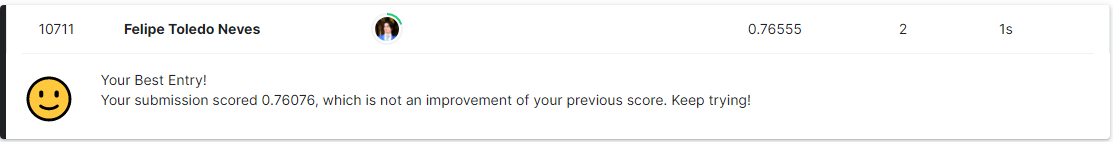